##  Over and Downregulation

In [2]:
# in this part we want to detect reactions that could be over or down regulated in order to increase the production of our objective resveratrol
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cameo
from cobra.io import read_sbml_model

In [3]:
# Verify working directory and change it if needed
import os
os.getcwd()
os.chdir("C:/Users/Deborah/anaconda3/envs/cellfactorydesign/27410-group-assigment-group-4-resveratrol-in-s-cerevisiae/") #change accordingly

In [4]:
# Read the heterologous model
model = read_sbml_model("data/models/yeast8_resv_glc.xml")

#### Flux Balance Analysis

In [5]:
from cameo import fba

# reference model with maximized biomass production and default parameters
m_ref=model.copy()

In [6]:
m_ref.objective=m_ref.reactions.GROWTH
m_ref.optimize()
fba1=fba(m_ref)
fba_ref=fba1.data_frame
fba_ref.sort_values(by='flux', ascending=False, inplace=True)
print(fba_ref.loc['EX_o2_e'])
print(fba_ref.loc['EX_glc__D_e'])
print(fba_ref.loc['GROWTH'])
print(fba_ref.loc['VVVST1'])
fba_ref

flux   -2.331533
Name: EX_o2_e, dtype: float64
flux   -1.0
Name: EX_glc__D_e, dtype: float64
flux    0.081928
Name: GROWTH, dtype: float64
flux    0.0
Name: VVVST1, dtype: float64


,flux
FERCOXOXI,9.037760
ATPtm,6.330327
ATPS3m,5.734898
PIt2m,5.162975
UBICRED,4.518880
...,...
EX_glc__D_e,-1.000000
CO2tm,-1.832126
EX_o2_e,-2.331533
H2Ot,-4.338799


In [7]:
# new model copy for optimizing growth of yeast by increasing the glucose uptake
m_glu=model.copy()
print('Glucose bounds: ', m_glu.reactions.EX_glc__D_e.bounds)

Glucose bounds:  (-1.0, 1000.0)


In [8]:
from cameo.core import manipulation

# increasing the uptake of glucose from -1.0 to -10.0
manipulation.increase_flux(m_glu.reactions.EX_glc__D_e, -1.0, -10.0)

# check if the boundaries were updated
print('Glucose bounds: ', m_glu.reactions.EX_glc__D_e.bounds)

# flux balance analysis to see the effects on the oxygen uptake, growth and our product
fba2=fba(m_glu, objective=m_glu.reactions.GROWTH)
fba_glu=fba2.data_frame
fba_glu.sort_values(by='flux', ascending=False, inplace=True)
print(fba_glu.loc['EX_o2_e'])
print(fba_glu.loc['EX_glc__D_e'])
print(fba_glu.loc['GROWTH'])
print(fba_glu.loc['VVVST1'])
fba_glu

Glucose bounds:  (-10.0, -10.0)
flux   -22.065527
Name: EX_o2_e, dtype: float64
flux   -10.0
Name: EX_glc__D_e, dtype: float64
flux    0.847193
Name: GROWTH, dtype: float64
flux    0.0
Name: VVVST1, dtype: float64


,flux
FERCOXOXI,85.280142
ATPtm,60.187375
ATPS3m,55.296138
PIt2m,48.116143
EX_h2o_e,42.822040
...,...
EX_glc__D_e,-10.000000
CO2tm,-18.654943
EX_o2_e,-22.065527
H2Ot,-42.822040


We can see that an increased uptake of glucose directly impacts the growth of the host linearly. The growth has increased from 0.082 to 0.84. The product flux is still zero. Therefore, we set the target now to the production of our product:

In [9]:
# copy of the model with the new objective of resveratrol
m_res=model.copy()

# increasing the uptake of glucose from -1.0 to -10.0
manipulation.increase_flux(m_res.reactions.EX_glc__D_e, -1.0, -10.0)
print('Glucose bounds: ', m_res.reactions.EX_glc__D_e.bounds)

fba3=fba(m_res, objective=m_res.reactions.VVVST1)
fba_res=fba3.data_frame
fba_res.sort_values(by='flux', ascending=False, inplace=True)
print(fba_res.loc['EX_o2_e'])
print(fba_res.loc['EX_glc__D_e'])
print(fba_res.loc['GROWTH'])
print(fba_res.loc['VVVST1'])
fba_res

Glucose bounds:  (-10.0, -10.0)
flux   -10.564225
Name: EX_o2_e, dtype: float64
flux   -10.0
Name: EX_glc__D_e, dtype: float64
flux    0.0
Name: GROWTH, dtype: float64
flux    3.189405
Name: VVVST1, dtype: float64


,flux
FERCOXOXI,42.256899
EX_h2o_e,40.863571
ATPtm,33.990997
ATPS3m,33.990997
UBICRED,21.128449
...,...
AKGCITtm,-8.769958
EX_glc__D_e,-10.000000
EX_o2_e,-10.564225
H2Otm,-38.972858


Even if we use the glucose of 10 [unit], we can see that the production of resveratrol leads to the death of the cell. Therefore, in the following model, we increase the growth of the host by higher glucose uptake and set a boundary for the growth of the host. The target of the model is still the resveratrol production.

In [40]:
m_res_glu=model.copy()

# increasing the glucose uptake
manipulation.increase_flux(m_res_glu.reactions.EX_glc__D_e, -1.0, -10.0)
# check if the boundaries were updated
print('Glucose bounds: ', m_res_glu.reactions.EX_glc__D_e.bounds)

# setting the constraint of having a minimum growth of 0.3 [unit]
m_res_glu.reactions.GROWTH.bounds=(0.4, 1000)

# flux balance analysis to see the effects on the oxygen uptake, growth and our product
fba4=fba(m_res_glu, objective=m_res_glu.reactions.VVVST1)
fba_res_glu=fba4.data_frame
fba_res_glu.sort_values(by='flux', ascending=False, inplace=True)
print(fba_res_glu.loc['EX_o2_e'])
print(fba_res_glu.loc['EX_glc__D_e'])
print(fba_res_glu.loc['GROWTH'])
print(fba_res_glu.loc['VVVST1'])
fba_res_glu

Glucose bounds:  (-10.0, -10.0)
flux   -15.821181
Name: EX_o2_e, dtype: float64
flux   -10.0
Name: EX_glc__D_e, dtype: float64
flux    0.4
Name: GROWTH, dtype: float64
flux    1.694719
Name: VVVST1, dtype: float64


,flux
FERCOXOXI,61.876794
ATPtm,45.330542
ATPS3m,42.720620
EX_h2o_e,41.721151
UBICRED,30.938397
...,...
EX_glc__D_e,-10.000000
CO2tm,-10.135733
EX_o2_e,-15.821181
H2Ot,-41.721151


So, now the flux of the product is lower due to cell growth but the cells are still alive.

In [27]:
import json
import xmltodict
os.chdir("C:/Users/Deborah/anaconda3/envs/cellfactorydesign/27410-group-assigment-group-4-resveratrol-in-s-cerevisiae/data/models/")

with open('yeast8_resv_glc.xml') as xml_file:
    data_dict = xmltodict.parse(xml_file.read())
    json_data = json.dumps(data_dict)
with open("data.json", "w") as json_file:
        json_file.write(json_data)

In [30]:
json_fba=fba_res_glu.to_json(orient="index")
parsed=json.loads(json_fba)
json.dumps(parsed, indent=4)
with open("fba_res_glu.json", "w") as json_file:
        json_file.write(json_data)

#### Flux Variabilty Analysis

In [11]:
from cameo import flux_variability_analysis

In [23]:
%%time
fva_res1 = flux_variability_analysis(m_res_glu)
fva1=fva_res1.data_frame.sort_values(by='upper_bound', ascending=False)
fva1

Wall time: 2min 4s


,lower_bound,upper_bound
AKGt,-1000.000000,1000.000000
ASPTAm,0.000000,1000.000000
HDCOAtrm,-1000.000000,1000.000000
DDCACOAtlp,-1000.000000,1000.000000
TTCCOAtrm,-1000.000000,1000.000000
...,...,...
EX_nh4_e,-51.547737,-2.144867
EX_o2_e,-46.566995,-3.463113
EX_glc__D_e,-10.000000,-10.000000
H2Ot,-178.806854,-10.077377


In [24]:
fva1.loc['VVVST1']

lower_bound    0.000000
upper_bound    2.073415
Name: VVVST1, dtype: float64

In [ ]:
%%time
fva_result1.plot(plotter, index=fva_result1.data_frame.index[:25])

DONT KNOW IF I STILL NEED IT

In [ ]:
from cameo.visualization.plotting.with_plotly import PlotlyPlotter
plotter = PlotlyPlotter()

from cameo.strain_design.deterministic.flux_variability_based import FSEOF
from cameo.strain_design.deterministic import DifferentialFVA

In [ ]:
from cameo.visualization import plotting
fva_result2.plot(plotter)

#### Find dead end reactions

In [12]:
from cameo.flux_analysis import structural
m_dead_end=m_res_glu.copy()

In [13]:
# Identify reactions that are structurally prevented from carrying flux (dead ends).
dead_end=structural.find_dead_end_reactions(m_dead_end)
dead_end

frozenset({<Reaction 13BDGLCNtce at 0x1aa7df40288>,
           <Reaction 2DOXG6PP at 0x1aa7e2c6288>,
           <Reaction 2PRO1ALNOXI at 0x1aa7e2ddb08>,
           <Reaction 3C4MOPtm at 0x1aa7df40c08>,
           <Reaction 3HYD2METCOAHYD at 0x1aa7e2c6a48>,
           <Reaction 3ISO3MET at 0x1aa7ddb8648>,
           <Reaction 3MBZALDH at 0x1aa7e2adf08>,
           <Reaction 4AHYDTETHYDHYDLYA at 0x1aa7e2c6208>,
           <Reaction 4HBZFm at 0x1aa7ddb8908>,
           <Reaction 4HTHRS at 0x1aa7ddb88c8>,
           <Reaction 4MBZALDH at 0x1aa7e2adf88>,
           <Reaction 4NITPHOPHO at 0x1aa7e2c6988>,
           <Reaction 5HOXINDACTOX at 0x1aa7e2ddc88>,
           <Reaction 8AONNt2 at 0x1aa7def7488>,
           <Reaction 8OXODGTDIP at 0x1aa7e2dd788>,
           <Reaction AADGGMADGLPMAT1236 at 0x1aa7e2c6ec8>,
           <Reaction AADGMAGLPMAT126892 at 0x1aa7e2ddfc8>,
           <Reaction AADGMAGLPMAT12689 at 0x1aa7e2ddf88>,
           <Reaction AAPPPPT at 0x1aa7e2dde48>,
           <React

In [14]:
for r in list(dead_end)[:10]:
    print(r)
    #id=m_dead_end.reactions.get_by_id(r)
    #print(id.id, id.name, id.reaction, id.bounds)

NADTRA3: dgmp_m + nad_c --> dgmp_c + nad_m
R06: h_c + pac_c --> 4hphac_c
CARESTHYD: ac_c + h_c + hqn_c --> 4hphac_c + h2o_c
ADDEGMADGLMPMAT11223967: dolmanp_r + s_3994 <=> dolp_r + s_3995
DOCOSACTlp: atp_lp + coa_lp + docosac_lp <=> amp_lp + docoscoa_lp + ppi_lp
ISO6ALPDGLU: h2o_c + isomal_c <=> glc__D_c + s_3951
DEX6ALPDGLU: 2.0 h2o_c + starch_c <=> 2.0 glc__D_c
r_4705: tchola_e --> tchola_copy1_c
DBGPMAMAMAMAMAMAMAMAMBGBGDA1212131213121616141413: h_r + s_3911 + s_3996 <=> dolp_r + s_4001
FALDH: fald_c + gthrd_c + nad_c --> Sfglutth_c + h_c + nadh_c


#### Flux Scanning based on Enforced Objective Flux

In [15]:
from cameo.strain_design.deterministic.flux_variability_based import FSEOF

In [16]:
# Apply the Flux Scanning based on Enforced Objective Flux from the cameo package
fseof = FSEOF(m_res_glu)

In [17]:
# Define the final reaction for trans-resveratrol reaction as objective
## the result shows that the amount of reaction rate of the reaction VVVST1 has increased by fold 10
result = fseof.run(target=m_res_glu.reactions.VVVST1)
df=result.data_frame
df

,1,2,3,4,5,6,7,8,9,10
DDPAm,0.522144,0.688049,0.853942,1.019836,1.185729,1.351623,1.517516,1.683410,1.849304,2.015197
DHQTi,0.522144,0.688049,0.853942,1.019836,1.185729,1.351623,1.517516,1.683410,1.849304,2.015197
DHQS,0.522144,0.688049,0.853942,1.019836,1.185729,1.351623,1.517516,1.683410,1.849304,2.015197
PSCVT,0.522144,0.688049,0.853942,1.019836,1.185729,1.351623,1.517516,1.683410,1.849304,2.015197
ACCOAC,1.504878,2.006391,2.507872,3.009352,3.510833,4.012313,4.513794,5.015274,5.516754,6.018235
...,...,...,...,...,...,...,...,...,...,...
ERGSTtrrm,0.029436,0.027620,0.025803,0.023985,0.022168,0.020351,0.018534,0.016717,0.014900,0.013082
HEMEAtm,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000000,0.000000,0.000000
HA-TAL,0.186607,0.373215,0.559822,0.746429,0.933037,1.119644,1.306251,1.492859,1.679466,1.866073
AT-4CL1,0.186607,0.373215,0.559822,0.746429,0.933037,1.119644,1.306251,1.492859,1.679466,1.866073


[Text(0, 0.5, 'Flux $\\left[\\dfrac{mmol}{gDW\\cdot h}\\right]$'),
 Text(0.5, 0, '# of steps of modelling - with each step the resveratrol flux increases'),
 Text(0.5, 1.0, 'all reactions')]

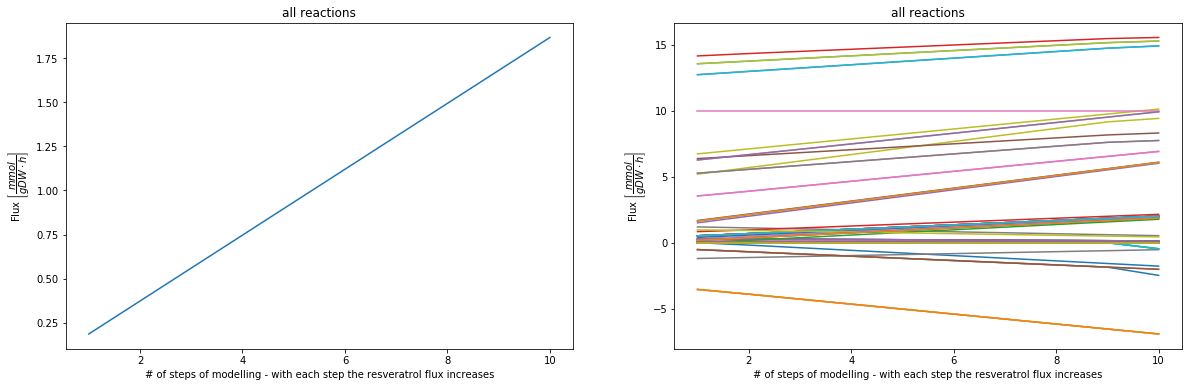

In [18]:
fig,(ax1, ax2)=plt.subplots(1,2, figsize=(20,6))
ax2.plot(df.T)
ax2.set(title='all reactions', xlabel='# of steps of modelling - with each step the resveratrol flux increases', ylabel=r'Flux $\left[\dfrac{mmol}{gDW\cdot h}\right]$')
ax1.plot(df.loc['VVVST1'])
ax1.set(title='all reactions', xlabel='# of steps of modelling - with each step the resveratrol flux increases', ylabel=r'Flux $\left[\dfrac{mmol}{gDW\cdot h}\right]$')

### Downregulation

In [19]:
# Filter for reactions that decrease while the resveratrol flux increases
df1=df[abs(df[1])>abs(df[10])]
df1.shape
df1

,1,2,3,4,5,6,7,8,9,10
ACGKm,0.298354,0.279946,0.261528,0.243109,0.224691,0.206272,0.187854,0.169436,0.151017,0.132599
ACOTAim,0.298354,0.279946,0.261528,0.243109,0.224691,0.206272,0.187854,0.169436,0.151017,0.132599
CPPPGO,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000000,0.000000,0.000000
FCLTm,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000000,0.000000,0.000000
GALT,1.195956,1.122167,1.048337,0.974506,0.900676,0.826845,0.753015,0.679184,0.605354,0.531523
...,...,...,...,...,...,...,...,...,...,...
PE160181tmmrm,0.016387,0.015375,0.014364,0.013352,0.012341,0.011329,0.010318,0.009306,0.008294,0.007283
12DGR161trmgm,-0.006805,-0.006385,-0.005965,-0.005545,-0.005125,-0.004705,-0.004284,-0.003864,-0.003444,-0.003024
PA161trmgm,0.006805,0.006385,0.005965,0.005545,0.005125,0.004705,0.004284,0.003864,0.003444,0.003024
ERGSTtrrm,0.029436,0.027620,0.025803,0.023985,0.022168,0.020351,0.018534,0.016717,0.014900,0.013082


In [20]:
# And filter for reactions theirs difference is bigger than so that reactions with very very low fluxes are filtered out
df3=df1[abs(df1[1]-df1[10])>0.1]
print(df3.shape)
df3=df3.sort_values(by=[10], ascending=False)
df3

(9, 10)


,1,2,3,4,5,6,7,8,9,10
GALT,1.195956,1.122167,1.048337,0.974506,0.900676,0.826845,0.753015,0.679184,0.605354,0.531523
ICDHym,0.970750,0.928508,0.867419,0.806329,0.745240,0.684151,0.623062,0.561973,0.500884,0.439795
ACGKm,0.298354,0.279946,0.261528,0.243109,0.224691,0.206272,0.187854,0.169436,0.151017,0.132599
ACOTAim,0.298354,0.279946,0.261528,0.243109,0.224691,0.206272,0.187854,0.169436,0.151017,0.132599
AGPRim,0.298354,0.279946,0.261528,0.243109,0.224691,0.206272,0.187854,0.169436,0.151017,0.132599
ORNTACim,0.298354,0.279946,0.261528,0.243109,0.224691,0.206272,0.187854,0.169436,0.151017,0.132599
ORNt3m,0.298354,0.279946,0.261528,0.243109,0.224691,0.206272,0.187854,0.169436,0.151017,0.132599
NDPK3,0.186083,0.174602,0.163114,0.151626,0.140139,0.128651,0.117164,0.105676,0.094189,0.082701
UGLT,-1.195956,-1.122167,-1.048337,-0.974506,-0.900676,-0.826845,-0.753015,-0.679184,-0.605354,-0.531523


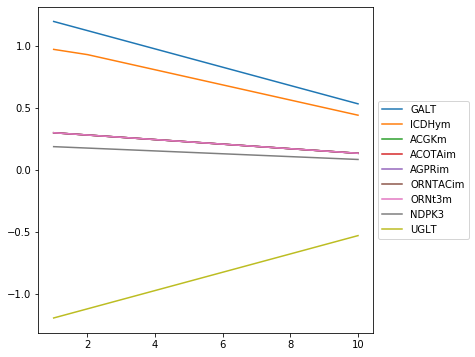

In [21]:
df3.T.plot(figsize=(6,6))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

Interesting reactions could be ACONTa, ICDHyr, ACONTb, AKGCITm, ILETAm

In [22]:
# List of the most important reactions for down regulation
down=df3.index.values.tolist()
for rx in down:
    ID = model.reactions.get_by_id(rx)
    flux=fba_res_glu.loc[ID.id]
    print(ID.id,"  ",ID.name, "  ", 'flux: ', flux[0]) #, ID.reaction, "  ", , "  ", 'boundaries:', ID.bounds

GALT    galactose-1-phosphate uridylyltransferase    flux:  0.0
ICDHym    isocitrate dehydrogenase    flux:  0.3719177919789594
ACGKm    acetylglutamate kinase    flux:  0.11213372102803199
ACOTAim    acteylornithine transaminase    flux:  0.112133721028032
AGPRim    N-acetyl-g-glutamyl-phosphate reductase    flux:  0.112133721028032
ORNTACim    ornithine transacetylase    flux:  0.112133721028032
ORNt3m    ornithine transport    flux:  0.112133721028032
NDPK3    nucleoside diphosphate kinase    flux:  0.0035571149127805565
UGLT    UDPglucose--hexose-1-phosphate uridylyltransferase    flux:  0.0


In [23]:
m_down=m_res_glu.copy()

In [24]:
with m_down:
    print('Biomass bounds: ', m_down.reactions.GROWTH.bounds)
    print('Glucose bounds: ', m_down.reactions.EX_glc__D_e.bounds)
    
    manipulation.decrease_flux(reaction=m_down.reactions.GALT, ref_value=df.loc['GALT'][1], value=df.loc['GALT'][10])
    manipulation.decrease_flux(reaction=m_down.reactions.ICDHym, ref_value=df.loc['ICDHym'][1], value=df.loc['ICDHym'][10])
    manipulation.decrease_flux(reaction=m_down.reactions.ACGKm, ref_value=df.loc['ACGKm'][1], value=df.loc['ACGKm'][10])
    manipulation.decrease_flux(reaction=m_down.reactions.ACOTAim, ref_value=df.loc['ACOTAim'][1], value=df.loc['ACOTAim'][10])

    # flux balance analysis to see the effects on the oxygen uptake, growth and our product
    fba5=fba(m_down, objective=m_down.reactions.VVVST1)
    fba_down=fba5.data_frame
    fba_down.sort_values(by='flux', ascending=False, inplace=True)
    print(fba_down.loc['EX_o2_e'])
    print(fba_down.loc['EX_glc__D_e'])
    print(fba_down.loc['GROWTH'])
    print(fba_down.loc['VVVST1'])
    fba_down

Biomass bounds:  (0.3, 999999)
Glucose bounds:  (-10.0, -10.0)
flux   -14.429065
Name: EX_o2_e, dtype: float64
flux   -10.0
Name: EX_glc__D_e, dtype: float64
flux    0.3
Name: GROWTH, dtype: float64
flux    2.073415
Name: VVVST1, dtype: float64


### Overexpression

In [25]:
# Filter for reactions theirs flux increases with the resveratrol flux
df4=df[abs(df[1])<abs(df[10])]
df4['diff']=abs(df4[10])-abs(df4[1]) #/df4[1]
print(df4.shape)
df4.head(10)

C:\Users\Deborah\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(44, 11)


,1,2,3,4,5,6,7,8,9,10,diff
DDPAm,0.522144,0.688049,0.853942,1.019836,1.185729,1.351623,1.517516,1.683410,1.849304,2.015197,1.493053
DHQTi,0.522144,0.688049,0.853942,1.019836,1.185729,1.351623,1.517516,1.683410,1.849304,2.015197,1.493053
DHQS,0.522144,0.688049,0.853942,1.019836,1.185729,1.351623,1.517516,1.683410,1.849304,2.015197,1.493053
PSCVT,0.522144,0.688049,0.853942,1.019836,1.185729,1.351623,1.517516,1.683410,1.849304,2.015197,1.493053
ACCOAC,1.504878,2.006391,2.507872,3.009352,3.510833,4.012313,4.513794,5.015274,5.516754,6.018235,4.513357
ACS,1.681950,2.172538,2.663087,3.153636,3.644186,4.134735,4.625284,5.115833,5.606382,6.096932,4.414982
ADK1,6.728474,7.105819,7.482956,7.860093,8.237230,8.614367,8.991504,9.368641,9.745778,10.122915,3.394441
ALDD2y,1.635463,2.128919,2.622338,3.115757,3.609176,4.102595,4.596014,5.089433,5.582852,6.076271,4.440808
CHORM,0.402901,0.576163,0.749418,0.922673,1.095927,1.269182,1.442437,1.615692,1.788947,1.962201,1.559300
CHORS,0.522144,0.688049,0.853942,1.019836,1.185729,1.351623,1.517516,1.683410,1.849304,2.015197,1.493053


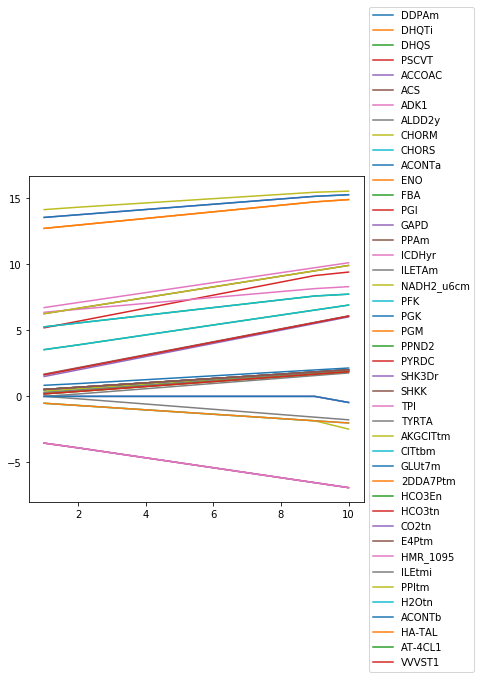

In [26]:
df4.T[:10].plot(figsize=(6,6))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [30]:
df5=df4[(abs(df4[10])-abs(df4[1]))>3.4]

# Sort values
df5=df5.sort_values(by=['diff'], ascending=False)
print(df5.shape)
df5.head(10)

(7, 11)


,1,2,3,4,5,6,7,8,9,10,diff
ACCOAC,1.504878,2.006391,2.507872,3.009352,3.510833,4.012313,4.513794,5.015274,5.516754,6.018235,4.513357
ALDD2y,1.635463,2.128919,2.622338,3.115757,3.609176,4.102595,4.596014,5.089433,5.582852,6.076271,4.440808
PYRDC,1.635463,2.128919,2.622338,3.115757,3.609176,4.102595,4.596014,5.089433,5.582852,6.076271,4.440808
ACS,1.681950,2.172538,2.663087,3.153636,3.644186,4.134735,4.625284,5.115833,5.606382,6.096932,4.414982
PGI,5.193882,5.688534,6.183360,6.678186,7.173011,7.667837,8.162663,8.657488,9.152314,9.416480,4.222598
PPItm,6.265316,6.671237,7.076967,7.482696,7.888425,8.294154,8.699884,9.105613,9.511342,9.917072,3.651756
PPAm,6.265317,6.671238,7.076967,7.482696,7.888426,8.294155,8.699884,9.105613,9.511343,9.917072,3.651755


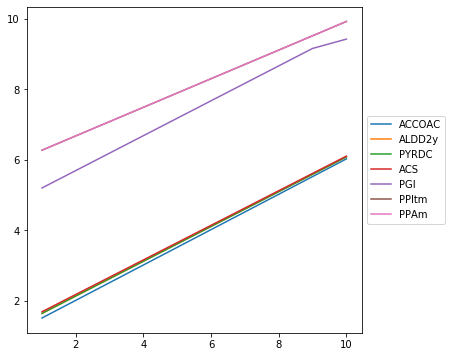

In [31]:
# Overexpression of these reactions and more lead to 10-fold increase of resveratrol
df5.drop(['diff'], axis=1, inplace=True)
df5.head(10).T.plot(figsize=(6,6))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [32]:
over=df5.head(10).index.values.tolist()
for rx in over:
    ID = model.reactions.get_by_id(rx)
    print(ID.id,"  ",ID.name, "  ",ID.reaction,"  ", 'boundaries:', ID.bounds)

ACCOAC    acetyl-CoA carboxylase, reaction    accoa_c + atp_c + hco3_c --> adp_c + h_c + malcoa_c + pi_c    boundaries: (0.0, 1000.0)
ALDD2y    aldehyde dehydrogenase (acetaldehyde, NADP)    acald_c + h2o_c + nadp_c --> ac_c + 2.0 h_c + nadph_c    boundaries: (0.0, 1000.0)
PYRDC    pyruvate decarboxylase    h_c + pyr_c --> acald_c + co2_c    boundaries: (0.0, 1000.0)
ACS    acetyl-CoA synthetase    ac_c + atp_c + coa_c --> accoa_c + amp_c + ppi_c    boundaries: (0.0, 1000.0)
PGI    glucose-6-phosphate isomerase    g6p_c <=> f6p_c    boundaries: (-1000.0, 1000.0)
PPItm    pyrophosphate transport    ppi_c <=> ppi_m    boundaries: (-1000.0, 1000.0)
PPAm    inorganic diphosphatase    h2o_m + ppi_m --> h_m + 2.0 pi_m    boundaries: (0.0, 1000.0)


In [33]:
m_up=m_res_glu.copy()

In [49]:
with m_up:
    print('Biomass bounds: ', m_up.reactions.GROWTH.bounds)
    print('Glucose bounds: ', m_up.reactions.EX_glc__D_e.bounds)
    
    print(m_up.reactions.ACCOAC.bounds)
    manipulation.increase_flux(reaction=m_up.reactions.ACCOAC, ref_value=df5.loc['ACCOAC'][1], value=df5.loc['ACCOAC'][10])
    print(m_up.reactions.ACCOAC.bounds)
    manipulation.increase_flux(reaction=m_up.reactions.ALDD2y, ref_value=df5.loc['ALDD2y'][1], value=df5.loc['ALDD2y'][10])
    manipulation.increase_flux(reaction=m_up.reactions.PYRDC, ref_value=df5.loc['PYRDC'][1], value=df5.loc['PYRDC'][10])
    manipulation.increase_flux(reaction=m_up.reactions.ACS, ref_value=df5.loc['ACS'][1], value=df5.loc['ACS'][10])

    # flux balance analysis to see the effects on the oxygen uptake, growth and our product
    fba6=fba(m_up, objective=m_up.reactions.VVVST1)
    fba_up=fba6.data_frame
    fba_up.sort_values(by='flux', ascending=False, inplace=True)
    print(fba_up.loc['EX_o2_e'])
    print(fba_up.loc['EX_glc__D_e'])
    print(fba_up.loc['GROWTH'])
    print(fba_up.loc['VVVST1'])
    fba_up

Biomass bounds:  (0.3, 999999)
Glucose bounds:  (-10.0, -10.0)
(0.0, 1000.0)
(10, 1000.0)
flux   -18.806321
Name: EX_o2_e, dtype: float64
flux   -10.0
Name: EX_glc__D_e, dtype: float64
flux    0.3
Name: GROWTH, dtype: float64
flux    1.791011
Name: VVVST1, dtype: float64


In [22]:
# Save reaction rates for the highest resveratrol flux as json file
# df[10].to_json('C:/Users/Deborah/anaconda3/envs/cellfactorydesign/27410-group-assigment-group-4-resveratrol-in-s-cerevisiae/data/fseof_reactions.json')

### Simulations

In [26]:
m=model
m

Name,yeastGEM_v8__46__6__46__2
Memory address,0x017b23103ac8
Number of metabolites,2747
Number of reactions,4067
Number of groups,106
Objective expression,1.0*GROWTH - 1.0*GROWTH_reverse_c845e
Compartments,"cell envelope, cytoplasm, extracellular, mitochondrion, nucleus, peroxisome, endoplasmic reticulum, Golgi, lipid particle, vacuole, endoplasmic reticulum membrane, vacuolar membrane, Golgi membrane, mitochondrial membrane"


In [27]:
m.obejctive=m.reactions.VVVST1
m.optimize()

,fluxes,reduced_costs
D_LACDcm,0.000000,-1.772186e-02
D_LACDm,0.000000,-1.772186e-02
BTDD_RR,0.000000,-0.000000e+00
L_LACD2cm,0.000000,1.734723e-18
13BETGLUSYN,0.061324,-5.204170e-18
...,...,...
r_4710,0.000000,0.000000e+00
HA-TAL,0.000000,0.000000e+00
AT-4CL1,0.000000,-5.249745e-01
VVVST1,0.000000,4.336809e-17


In [31]:
%%time
fba = flux_variability_analysis(model=m, fraction_of_optimum=0.7)
fva2=fva_res2.data_frame.sort_values(by='upper_bound', ascending=False)
fva2

Wall time: 1min 44s


,lower_bound,upper_bound
COAtlp,-1000.000000,1000.000000
AKGt,-1000.000000,1000.000000
MATR161160181181161mm,-1000.000000,1000.000000
MATR181161161160161mm_copy1,-1000.000000,1000.000000
MATR180161181161161mm,-1000.000000,1000.000000
...,...,...
EX_nh4_e,-2.629082,-0.410024
EX_glc__D_e,-1.000000,-0.710942
EX_o2_e,-3.432073,-1.495960
H2Ot,-10.649106,-2.760379


In [32]:
fva2.loc['VVVST1']

lower_bound    0.000000
upper_bound    0.093195
Name: VVVST1, dtype: float64

In [21]:
for d in down:
    r=m.reactions.get_by_id(d)
    print(r.id, r.bounds)
print('-')
for o in over:
    r=m.reactions.get_by_id(o)
    print(r.id, r.bounds)

GALT (-999999.0, 999999.0)
ALCD2irm (0.0, 999999.0)
GHMT2rm (-999999.0, 999999.0)
NH4tm (-999999.0, 999999.0)
SERt2m (-999999.0, 999999.0)
MDHm (-999999.0, 999999.0)
SUCD3_u6m (-999999.0, 999999.0)
SUCCt2r (-999999.0, 999999.0)
ASAD (-999999.0, 0.0)
ASPTA (-999999.0, 999999.0)
H2Ot (-999999.0, 999999.0)
-
CYSTS (0.0, 999999.0)
AT-4CL1 (0.0, 999999.0)
HA-TAL (0.0, 999999.0)
VVVST1 (0.0, 999999.0)
THRS (0.0, 999999.0)
HSK (0.0, 999999.0)
HSDxi (0.0, 999999.0)
ASPK (0.0, 999999.0)
PPND2 (0.0, 999999.0)
TYRTAi (0.0, 999999.0)


In [12]:
# problem that the rv max production value is not divided by 3
print(m.reactions.EX_glc__D_e.bounds)

with m:
    m.reactions.EX_glc__D_e.bounds=(-100, 999999) 
    #m.reactions.H2Ot.bounds=(-999999,0)
    #m.reactions.GLUDy.bounds=(-100,100)
    
    '''
    for d in down:
        rx=m.reactions.get_by_id(d)
        rx.bounds=(-100, 100)
        print(rx.id, rx.bounds)
    '''
    #m.objective=m.reactions.VVVST1
    rv_maxp=m.optimize() #.objective_value
    print("Maximum resveratrol productivity = ",rv_maxp, " mmol/gDW*h")

    glucose_uptake_flux = m.reactions.EX_glc__D_e.flux # Glucose exchange reaction
    
    max_yield= rv_maxp / (-1*glucose_uptake_flux)
    print("Maximum theoretical yield is = ", max_yield, "mmol/gDW*h")
    
# Here, we can downregulate by lowering the lower bound (increasing the uptake of the substrate) but by decreasing the upper bound, we can ensure there is no metabolite production. 
# This depicts an increase in the trans-resveratrol yield from 1.17 to 2.64 mmol/gDWh
'''
default:
Maximum resveratrol productivity =  1.1785714285714284  mmol/gDW*h
Maximum theoretical yield is =  0.11785714285714284 mmol/gDW*h

with glucose boundaries of -100,99999:
Maximum resveratrol productivity =  8.892857142857155  mmol/gDW*h
Maximum theoretical yield is =  0.08892857142857155 mmol/gDW*h
'''

(-10.0, 999999.0)
Maximum resveratrol productivity =  <Solution 2.280 at 0x136959270c8>  mmol/gDW*h


TypeError: unsupported operand type(s) for /: 'Solution' and 'float'

### Differential Flux Variability Analysis

In [63]:
# Set the original model as reference to be compared with a set of models where n-reaction bounds are varied
reference_model = model.copy()
biomass_rxn = reference_model.reactions.BIOMASS_SC5_notrace
target = reference_model.metabolites.trans_resv

In [64]:
diff_fva = DifferentialFVA(design_space_model=model,
                           reference_model=reference_model,
                           objective=target,
                           variables=[biomass_rxn],
                           normalize_ranges_by=biomass_rxn,
                           points=10)

In [65]:
result = diff_fva.run(surface_only=True)
result

,lower_bound,upper_bound,gaps,normalized_gaps,biomass,production,KO,flux_reversal,suddenly_essential,free_flux,reaction,excluded
reaction,,,,,,,,,,,,
PGL,0.000371,0.000371,-0.802099,-2.784754,0.12794,0.716157,False,False,False,False,PGL,False
GND,0.000371,0.000371,-0.802099,-2.784754,0.12794,0.716157,False,False,False,False,GND,False
G6PDH2r,0.000000,0.000000,-0.801635,-2.784754,0.12794,0.716157,True,False,False,False,G6PDH2r,False
PDHm,0.209950,0.209950,-0.498439,-0.819831,0.12794,0.716157,False,False,False,False,PDHm,False
CSm,0.130346,0.130346,-0.398933,-0.819831,0.12794,0.716157,False,False,False,False,CSm,False
...,...,...,...,...,...,...,...,...,...,...,...,...
PYK,16.792033,16.792033,-0.929957,69.685565,0.12794,0.716157,False,False,False,False,PYK,False
GAPD,18.291976,18.291976,0.253771,80.310856,0.12794,0.716157,False,False,False,False,GAPD,False
PGK,-18.291976,-18.291976,0.253771,80.310856,0.12794,0.716157,False,False,False,False,PGK,False


In [ ]:
# Visualize the reaction rate changes in escher map
result.display_on_map(5, map_name="iMM904.Central carbon metabolism")